# Домашнее задание

Задание 1 [5 баллов]. Дана функция $f(x) = C * exp(cos(x))*sin(x)$ на интервале $I\{x \in [0, \pi] = [a, b]\}$.
При этом $f(x) = 0$ вне указанного интервала

1. Определите значение константы C, при которой данная функция является плотностью распределения.
2. Изобразите графически функцию плотности.
3. Рассчитайте формулу для функции распределения и изобразите её графически.
4. Рассчитайте значение математического ожидания (подсказка - может помочь scipy.integrate)
5. Проверьте центральную предельную теорему для данного распределения.

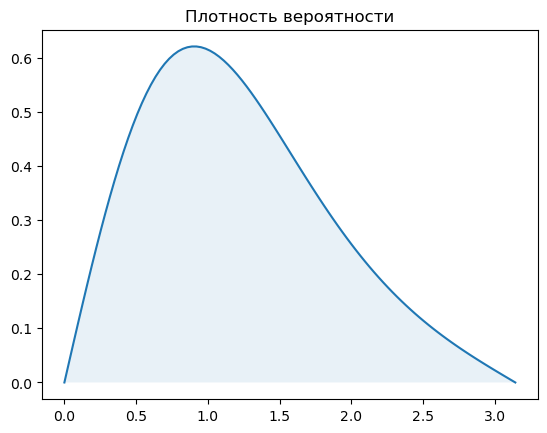

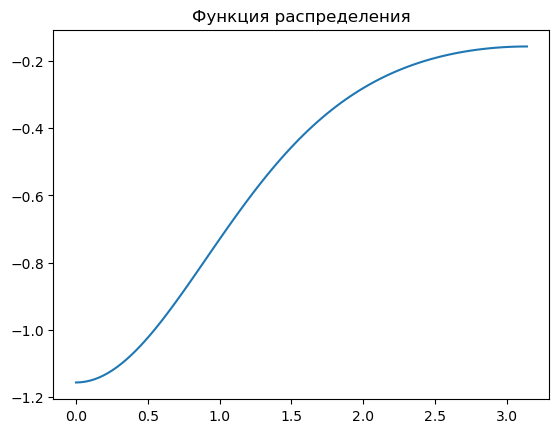

MO:1.2005331194282045, err:8.727609055653756e-11


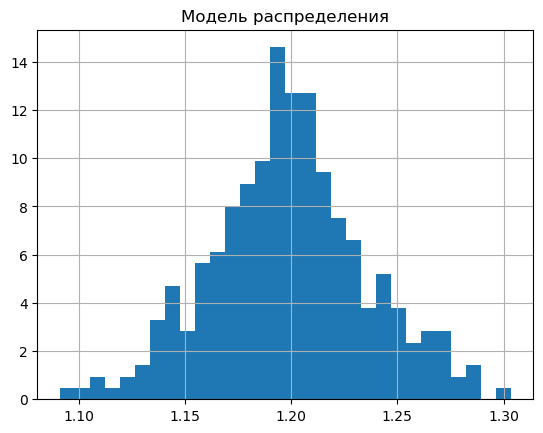

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss
import scipy.integrate as si

# Выражение 𝑓(𝑥)=𝐶∗𝑒𝑥𝑝(𝑐𝑜𝑠(𝑥))∗𝑠𝑖𝑛(𝑥) = 1, в случае, если C = 0.425459064

C=0.425459064
def f(x):
    if x<0:
        ret=0
    elif x>np.pi:
        ret=0
    else:
        ret=C*np.exp(np.cos(x))*np.sin(x)
    return ret

# Первая производная от f(x) - функция распределения
def pf(x):
    if x<0:
        ret=0
    elif x>np.pi:
        ret=0
    else:
        ret=-C*np.exp(np.cos(x))
    return ret

def mw(x):
    if x<0:
        ret=0
    elif x>np.pi:
        ret=0
    else:
        ret=C*x*np.exp(np.cos(x))*np.sin(x)
    return ret

x=np.linspace(0,np.pi,100)
y=[f(a) for a in x]
A=0
B=np.pi
z=si.quad(mw,A,B) # Вычисляем мат.ожидание и точность
plt.plot(x,y)
plt.fill_between(x,y, alpha=0.1)
plt.title('Плотность вероятности')
plt.show()
py=[pf(a) for a in x]
plt.plot(x,py)
plt.title('Функция распределения')
plt.show()

mo, err = si.quad(lambda x: x*f(x), 0, np.pi)
print(f"MO:{mo}, err:{err}")

class RVs(ss.rv_continuous):
    def _pdf(self, x):
        return f(x)
    
my_rvs = RVs(a=A, b=B, name='f')
samples = np.array([my_rvs.rvs(size=300) for i in range(300)])
plt.hist(samples.mean(axis=0), density=True, bins=30)
plt.grid()
plt.title('Модель распределения')
plt.show()


Задание 2 [5 баллов]. Сгенерируйте 3 выборки из 3 различных распределений размерностью 1000, 50 000, 750 000

1. Рассчитайте основные статистические показатели для каждой из выборок и сравните их с теоретическими показателями выбранных вами распределений. Должны быть посчитаны:
- среднее
- дисперсия
2. Проверьте критерий Колмогорова для 3 выборок.
3. Для каждой пары выборок (всего будет 3) проверьте критерий Манна-Уитни.

In [2]:
from scipy.stats import kstest, mannwhitneyu

In [3]:
import numpy as np
np.random.seed(1)

In [4]:
ds1 = np.random.normal(1.0, 2.0, 1000) 
ds2 = np.random.normal(-1.8, 1.8, 50000)
ds3 = np.random.normal(0.5, 3.3, 750000)

In [5]:
# Считаем среднее
np.mean(ds1), np.mean(ds2), np.mean(ds3)

(1.0776249523192036, -1.7946657389140126, 0.5051148917361576)

In [6]:
#Считаем дисперсию
np.std(ds1), np.std(ds2), np.std(ds3)

(1.9620082678644233, 1.8019347010748363, 3.2989359939834295)

In [7]:
# Критерий Колмогорова датасет №1
kstest(ds1, "norm", alternative='less')

KstestResult(statistic=0.3627926182141682, pvalue=9.840110362682542e-119)

В датасете №1 слишком мало элементов, о чем свидетельствует pvalue

In [8]:
# Критерий Колмогорова датасет №2
kstest(ds2, "norm", alternative='less')

KstestResult(statistic=0.003003872650449768, pvalue=0.4048148522642634)

In [9]:
# Критерий Колмогорова датасет №3
kstest(ds3, "norm", alternative='less')

KstestResult(statistic=0.3156761940121596, pvalue=0.0)

Наилучший датасет с точки зрения количества данных, наибольшая точность среди всех

In [10]:
# Критерий Манна-Уитни датасет №1
mannwhitneyu(ds1, ds2)

MannwhitneyuResult(statistic=43010906.0, pvalue=0.0)

In [11]:
# Критерий Манна-Уитни датасет №2
mannwhitneyu(ds2, ds3)

MannwhitneyuResult(statistic=10143450701.0, pvalue=0.0)

In [12]:
# Критерий Манна-Уитни датасет №3
mannwhitneyu(ds2, ds3)

MannwhitneyuResult(statistic=10143450701.0, pvalue=0.0)